<a href="https://colab.research.google.com/github/Vaibhav67979/MachineLearning/blob/br/MLCourse/OutlierAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outlier Analysis

##What is an outlier
Observations inconsistent with rest of the dataset global outlier.

- Poor data quality / contamination
- Low quality measurements
- correct but exceptlional data

##Diabetes dataset

###Setup and Imports

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
files.upload()

###EDA

In [ ]:
training = pd.read_csv('diabetes.csv')
training

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
training.shape

(768, 9)

In [ ]:
training.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
training.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

###Removing Redundant data

In [ ]:
training = training.drop(training[training['SkinThickness']==0].index, axis = 0)
training

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [ ]:
training = training.drop(training[training['BMI']==0].index, axis = 0)
training

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [ ]:
training = training.drop(training[training['Age']==0].index, axis = 0)
training

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


###Missing Value Analysis

In [ ]:
training.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
761,False,False,False,False,False,False,False,False,False
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False


In [ ]:
mv = pd.DataFrame(training.isnull().sum())
mv

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


###Outlier Analysis

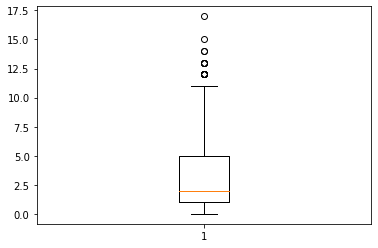

In [ ]:
out_preg = plt.boxplot(training['Pregnancies'])

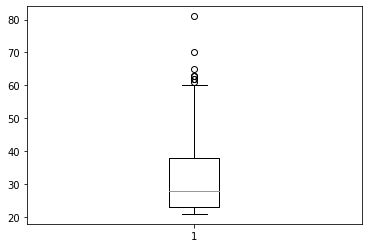

In [ ]:
out_preg = plt.boxplot(training['Age'])

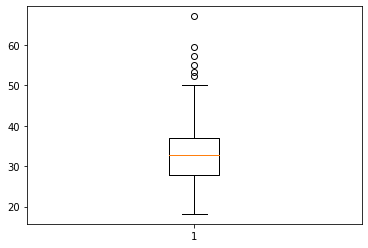

In [ ]:
out_preg = plt.boxplot(training['BMI'])

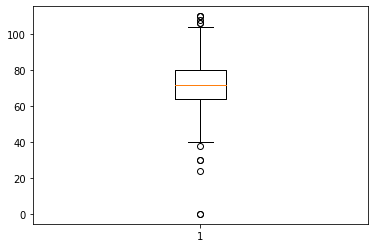

In [ ]:
out_preg = plt.boxplot(training['BloodPressure'])

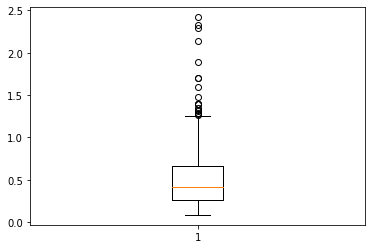

In [ ]:
out_preg = plt.boxplot(training['DiabetesPedigreeFunction'])

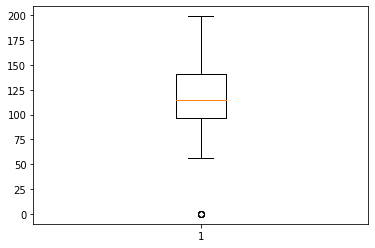

In [ ]:
out_preg = plt.boxplot(training['Glucose'])

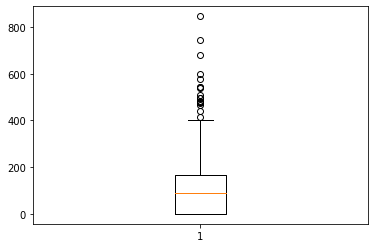

In [ ]:
out_preg = plt.boxplot(training['Insulin'])

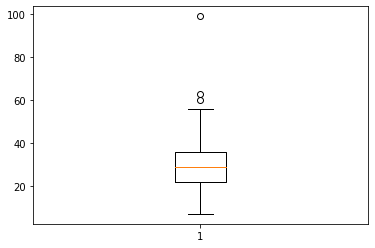

In [ ]:
out_preg = plt.boxplot(training['SkinThickness'])

####Determination of Interquartile range(IQR)

In [ ]:
col_names = []
for i,j in training.items():
  if i!='Outcome':
    col_names.append(i)
    outlier_analysis(i)

Pregnancies
q75 : 5.0
q25 : 1.0
minimum : -5.0
maximium : 11.0
Glucose
q75 : 140.5
q25 : 97.0
minimum : 31.75
maximium : 205.75
BloodPressure
q75 : 80.0
q25 : 64.0
minimum : 40.0
maximium : 104.0
SkinThickness
q75 : 36.0
q25 : 22.0
minimum : 1.0
maximium : 57.0
Insulin
q75 : 165.0
q25 : 0.0
minimum : -247.5
maximium : 412.5
BMI
q75 : 36.9
q25 : 27.85
minimum : 14.275000000000006
maximium : 50.474999999999994
DiabetesPedigreeFunction
q75 : 0.659
q25 : 0.259
minimum : -0.3410000000000001
maximium : 1.2590000000000001
Age
q75 : 38.0
q25 : 23.0
minimum : 0.5
maximium : 60.5


In [ ]:
def outlier_analysis(col_names):
  print(col_names)
  q75, q25 = np.percentile(training[col_names], [75, 25])
  print(f"q75 : {q75}\nq25 : {q25}")
  iqr = q75 - q25
  minimum = q25 - (iqr*1.5)
  maximum = q75 + (iqr*1.5)
  print(f"minimum : {minimum}")
  print(f"maximium : {maximum}")
  training.loc[training[col_names] < minimum, col_names] = np.nan
  training.loc[training[col_names] > maximum, col_names] = np.nan



In [ ]:
pd.DataFrame(training.isnull().sum())

,0
Pregnancies,17
Glucose,5
BloodPressure,12
SkinThickness,3
Insulin,19
BMI,6
DiabetesPedigreeFunction,19
Age,9
Outcome,0


In [ ]:
training


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,NaN,33.0,1
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
...,...,...,...,...,...,...,...,...,...
761,9.0,170.0,74.0,31.0,0.0,44.0,0.403,43.0,1
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,NaN,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0


####Outlier Imputation

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
After_imputation = imputer.fit_transform(training)

KNN - K nearest neighbor (classification algorithm)

In [ ]:
training.shape

(539, 9)

In [ ]:
training.isnull().sum()

Pregnancies                 17
Glucose                      5
BloodPressure               12
SkinThickness                3
Insulin                     19
BMI                          6
DiabetesPedigreeFunction    19
Age                          9
Outcome                      0
dtype: int64

In [ ]:
After_imputation

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  1.   ,  89.   ,  66.   , ...,   0.167,  21.   ,   0.   ],
       ...,
       [  2.   , 122.   ,  70.   , ...,   0.34 ,  27.   ,   0.   ],
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

#Feature Selection

- It eliminates irrelevent and noisy features.
- It reduces computational time and complexity of training and testing.
- It improves learning algorithm's perfomance.

##Correlation

- Positive Correlation - 
  * Two variables x and y, are going in the same direction.
  * if x rises y also rises and vice versa.
  * directly proportional
  * Ex - age and income.
- Negative Correaltion - 
  * Two variables x and y, are going in the opposite direction.
  * if x rises y falls and vice versa. 
  * indirectly proportional.
  * Ex - sales of woolen clothes and temparature.